# Pandas 

## contenido
- Fundamentos y E/S
- Selección, filtrado e indexación 
- Limpieza y preparación de datos 
- Transformaciones y funciones
- Agrupaciones, pivotes y ventanas 
- Joins, concat y reshaping 
- Series de tiempo 
- Texto y categóricos
- Rendimiento y depuración
- Visualización con Matplotlib 

[Cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

# importaciones

In [70]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler

# rutas

In [2]:
np.random.seed(42)
data_dir = Path('static/data/')
data_dir.mkdir(parents=True, exist_ok=True)

# Fundamentos y E/S

### Crear Series y DataFrames

![Serie](static/img/serie.png) ![DataFrame](static/img/dataframe.png) 

In [3]:
s = ["x","y","z"]
series = pd.Series(s, name="S")
print(series)

0    x
1    y
2    z
Name: S, dtype: object


In [4]:
a = [1,2,3]
b = ["x","y","z"]
df = pd.DataFrame({"A":a, "B":b})
print(df)

   A  B
0  1  x
1  2  y
2  3  z


### Lectura

In [5]:
# ruta
ruta_csv = "static/csv/winemag-data_first150k.csv"
# variable
#lectura de csv
df_csv = pd.read_csv(ruta_csv,delimiter=";")
df_csv.head(2)
#lectura de excel
#ruta_excel = "static/excel/mi_excel.xlsx"
#df_excel = pd.read_excel(ruta_excel, sheet_name="Hoja1")
#LECTURA DE JSON
# ruta_json = "static/json/mi_json.json"  
# df_json = pd.read_json(ruta_json)
#LECTURA DE HTML
# ruta_html = "static/html/mi_html.html"
# df_html = pd.read_html(ruta_html)
#LECTURA DE PARQUET
# ruta_parquet = "static/parquet/mi_parquet.parquet"    
# df_parquet = pd.read_parquet(ruta_parquet)

,country,designation,points,price,province,region_1,region_2,variety,winery,last_year_points
0,US,Martha's Vineyard,96.0,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,94
1,Spain,Carodorum Selección Especial Reserva,96.0,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,92


### Selección de columnas

In [6]:
columnas = ['country', 'designation', 'points', 'price', 'province', 'region_1','region_2', 'variety', 'winery', 'last_year_points']
columnas

['country',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'variety',
 'winery',
 'last_year_points']

In [7]:
columnas_filtradas = ['country', 'designation', 'price']
df_csv['country'].head(2)

0       US
1    Spain
Name: country, dtype: object

In [8]:
columnas_filtradas = ['country', 'designation', 'price']
df_csv[columnas_filtradas].head(2)
#df_2 =df_csv[columnas_filtradas].head(2)

,country,designation,price
0,US,Martha's Vineyard,235.0
1,Spain,Carodorum Selección Especial Reserva,110.0


### Información general dataframe

In [9]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144037 entries, 0 to 144036
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   country           144035 non-null  object 
 1   designation       100211 non-null  object 
 2   points            144032 non-null  float64
 3   price             130641 non-null  float64
 4   province          144030 non-null  object 
 5   region_1          120192 non-null  object 
 6   region_2          58378 non-null   object 
 7   variety           144032 non-null  object 
 8   winery            144032 non-null  object 
 9   last_year_points  144037 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 11.0+ MB


In [10]:
df_csv.describe()

,points,price,last_year_points
count,144032.000000,130641.000000,144037.000000
mean,87.873424,33.123399,89.998452
std,3.215821,36.368177,6.050240
min,80.000000,4.000000,80.000000
25%,86.000000,16.000000,85.000000
50%,88.000000,24.000000,90.000000
75%,90.000000,40.000000,95.000000
max,100.000000,2300.000000,100.000000


### Tipos de Conversion

In [11]:
len(df_csv)

144037

In [12]:
df_csv["date_f"]= np.random.choice(pd.date_range("2025-01-01", "2025-12-31"), size=len(df_csv))
df_csv["date_f"].head(2)

0   2025-04-13
1   2025-12-15
Name: date_f, dtype: datetime64[ns]

In [13]:
df_fecha = pd.DataFrame()
df_fecha["fecha"] = pd.to_datetime(df_csv["date_f"], format="%Y-%m-%d")
#df_fecha["fecha"] = pd.to_datetime(df_csv["date_f"], format="%Y-%m-%d")
df_fecha["fecha"].head(2)

0   2025-04-13
1   2025-12-15
Name: fecha, dtype: datetime64[ns]

In [14]:
df_fecha.min()

fecha   2025-01-01
dtype: datetime64[ns]

In [15]:
df_fecha.max()

fecha   2025-12-31
dtype: datetime64[ns]

### Guardado de subconjunto

In [16]:
df_fecha["fecha2"] = pd.to_datetime(df_csv["date_f"], format="%Y-%m-%d").copy()

In [17]:
df_fecha[df_fecha["fecha2"] > "2025-08-31"].copy()

,fecha,fecha2
1,2025-12-15,2025-12-15
2,2025-09-28,2025-09-28
10,2025-11-27,2025-11-27
13,2025-12-26,2025-12-26
17,2025-11-05,2025-11-05
...,...,...
144024,2025-12-16,2025-12-16
144028,2025-10-31,2025-10-31
144033,2025-10-22,2025-10-22
144035,2025-09-06,2025-09-06


### Creación de indice

In [18]:
# definir la columna fecha como indice
indices =   df_fecha.set_index("fecha").copy()
print(indices.head(2))
# crear indice general
indices2 = df_fecha.reset_index().copy()
print(indices2.head(2))

               fecha2
fecha                
2025-04-13 2025-04-13
2025-12-15 2025-12-15
   index      fecha     fecha2
0      0 2025-04-13 2025-04-13
1      1 2025-12-15 2025-12-15


### valores unicos

In [19]:
indices2["fecha"].nunique()

365

### Ordenar

In [20]:
indices2.sort_values(by="fecha", ascending=True).head(10)

,index,fecha,fecha2
52566,52566,2025-01-01,2025-01-01
117850,117850,2025-01-01,2025-01-01
57006,57006,2025-01-01,2025-01-01
37688,37688,2025-01-01,2025-01-01
96327,96327,2025-01-01,2025-01-01
69559,69559,2025-01-01,2025-01-01
32314,32314,2025-01-01,2025-01-01
108096,108096,2025-01-01,2025-01-01
120621,120621,2025-01-01,2025-01-01
57008,57008,2025-01-01,2025-01-01


# Selección, filtrado e indexación 

### loc / iloc

In [21]:
df_fecha.loc[500:, ["fecha"]]

,fecha
500,2025-09-04
501,2025-09-15
502,2025-06-09
503,2025-12-06
504,2025-06-01
...,...
144032,2025-02-15
144033,2025-10-22
144034,2025-02-28
144035,2025-09-06


In [22]:
df_fecha.reset_index()

,index,fecha,fecha2
0,0,2025-04-13,2025-04-13
1,1,2025-12-15,2025-12-15
2,2,2025-09-28,2025-09-28
3,3,2025-04-17,2025-04-17
4,4,2025-03-13,2025-03-13
...,...,...,...
144032,144032,2025-02-15,2025-02-15
144033,144033,2025-10-22,2025-10-22
144034,144034,2025-02-28,2025-02-28
144035,144035,2025-09-06,2025-09-06


In [23]:
df_csv.iloc[3:5, 0:2]

,country,designation
3,US,Reserve
4,France,La Brûlade


### filtrado por condiciones

In [24]:
df_csv.columns

Index(['country', 'designation', 'points', 'price', 'province', 'region_1',
       'region_2', 'variety', 'winery', 'last_year_points', 'date_f'],
      dtype='object')

In [25]:
df_csv[(df_csv['date_f'] == "2025-10-31 00:00:00") & (df_csv['points'] > 90)].head(5)

,country,designation,points,price,province,region_1,region_2,variety,winery,last_year_points,date_f
75,US,Premier Cuvée,91.0,54.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Archery Summit,93,2025-10-31
273,US,Vintage Brut,92.0,48.0,California,Russian River Valley,Sonoma,Sparkling Blend,J Vineyards & Winery,98,2025-10-31
301,Italy,Vigneto Monte Sant'Urbano,94.0,85.0,Veneto,Amarone della Valpolicella Classico,NaN,Red Blend,Speri,88,2025-10-31
323,US,Pellet Vineyard,94.0,95.0,California,Napa Valley,Napa,Cabernet Sauvignon,Pellet Estate,89,2025-10-31
2128,France,NaN,97.0,450.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux,92,2025-10-31


### filtrado por multiplex condiciones

In [26]:
df_csv[(df_csv['price'].isin([10,50])) & (df_csv['points'].between(75,95))].head(5)

,country,designation,points,price,province,region_1,region_2,variety,winery,last_year_points,date_f
48,Italy,NaN,90.0,50.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Brunelli Martoccia,98,2025-03-30
68,US,Schindler Vineyard,91.0,50.0,Oregon,Eola-Amity Hills,Willamette Valley,Pinot Noir,Panther Creek,94,2025-07-10
89,US,Magnificat,91.0,50.0,California,Napa Valley,Napa,Meritage,Franciscan,90,2025-07-07
90,US,NaN,86.0,10.0,California,California,California Other,Cabernet Sauvignon,Belle Ambiance,83,2025-02-10
94,Portugal,Muros de Vinha,86.0,10.0,Douro,NaN,NaN,Portuguese Red,Quinta do Portal,98,2025-03-06


### isin

In [27]:
df_csv['price'].isin([10,50]).head(2)

0    False
1    False
Name: price, dtype: bool

### BETWEEN 

In [28]:
(df_csv['points'].between(75,95)).head(5) # QUERY

0    False
1    False
2    False
3    False
4     True
Name: points, dtype: bool

### QUERY

In [29]:
((df_csv['points'] >= 75) & (df_csv['points'] <= 95)).head(5)

0    False
1    False
2    False
3    False
4     True
Name: points, dtype: bool

### top-k por grupo

In [30]:
df_csv.sort_values('price', ascending= True).groupby('country').head(10)

,country,designation,points,price,province,region_1,region_2,variety,winery,last_year_points,date_f
113579,US,NaN,84.0,4.0,California,California,California Other,Cabernet Sauvignon,Bandit,90,2025-11-09
114469,US,NaN,84.0,4.0,California,California,California Other,Chardonnay,Bandit,80,2025-01-02
114479,US,NaN,84.0,4.0,California,California,California Other,Merlot,Bandit,82,2025-01-06
47305,US,NaN,86.0,4.0,California,California,California Other,Merlot,Bandit,97,2025-08-13
77245,US,NaN,86.0,4.0,California,California,California Other,Merlot,Bandit,88,2025-04-23
...,...,...,...,...,...,...,...,...,...,...,...
114188,Egypt,Caspar Blanc de Noirs,84.0,NaN,Egypt,NaN,NaN,Grenache,Sahara Vineyards,91,2025-08-02
114213,Egypt,Caspar,84.0,NaN,Egypt,NaN,NaN,Chenin Blanc,Sahara Vineyards,98,2025-12-17
115051,Egypt,NaN,83.0,NaN,Egypt,NaN,NaN,Viognier,Sahara Vineyards,97,2025-05-24
132359,Tunisia,Selian Mystère,87.0,NaN,Tunisia,NaN,NaN,Rosé,Domaine Neferis,81,2025-11-30


### muestra aleatoria

In [31]:
df_csv.sample(frac=0.02, random_state=42)

,country,designation,points,price,province,region_1,region_2,variety,winery,last_year_points,date_f
48804,US,NaN,83.0,9.0,California,California,California Other,Chardonnay,Happy Camper,100,2025-02-28
81868,Italy,Vigna Rionda Riserva,93.0,134.0,Piedmont,Barolo,NaN,Nebbiolo,Massolino,86,2025-12-03
15626,US,Dusi Vineyard/Martini Vineyard,85.0,20.0,California,Paso Robles,Central Coast,Zinfandel,Stephen Ross,85,2025-05-09
74237,France,Perrières Premier Cru,93.0,80.0,Burgundy,Meursault,NaN,Chardonnay,Domaine Vincent Girardin,94,2025-02-09
28762,Italy,Muntacc,90.0,24.0,Piedmont,Coste della Sesia,NaN,Red Blend,La Prevostura,100,2025-06-11
...,...,...,...,...,...,...,...,...,...,...,...
84945,US,Spinning Red,89.0,20.0,California,Napa Valley,Napa,Red Blend,Curveball,94,2025-05-29
91485,Italy,Scaccomatto,92.0,66.0,Central Italy,Albana di Romagna,NaN,Albana,Fattoria Zerbina,87,2025-12-12
19537,Portugal,Terra de Lobos Branco,87.0,8.0,Tejo,NaN,NaN,Portuguese White,Quinta do Casal Branco,88,2025-02-15
81730,Chile,NaN,83.0,10.0,Central Valley,NaN,NaN,Cabernet Sauvignon,Paso Grande,83,2025-11-13


### Manejo de duplicados

In [34]:
df_duplicados = df_csv.duplicated(subset=["province","region_1"])
df_duplicados.shape

(144037,)

In [36]:
noduplicados = df_csv[~df_duplicados].copy()
noduplicados.shape

(1623, 11)

### Reindices

In [39]:
rango =range(10)
print(rango)

range(0, 10)


In [49]:
province = noduplicados[["province"]].copy()
pro2 = province.reindex(range(len(province)+7))
pro2

,province
0,California
1,Northern Spain
2,California
3,Oregon
4,Provence
...,...
1625,NaN
1626,NaN
1627,NaN
1628,NaN


In [43]:
len(province)

1623

### rellenado fill

In [53]:
pro2["province"] = pro2["province"].ffill()
pro2.tail(5)

,province
1625,California
1626,California
1627,California
1628,California
1629,California


## Limpieza y preparación de datos 

### Valores perdidos

In [55]:
df_limpieza.columns

Index(['country', 'designation', 'points', 'price', 'province', 'region_1',
       'region_2', 'variety', 'winery', 'last_year_points', 'date_f'],
      dtype='object')

In [54]:
df_limpieza = df_csv.copy()
idx = df_limpieza.sample(frac=0.05, random_state=42).index
idx

Index([ 48804,  81868,  15626,  74237,  28762, 101461, 101773,  94157,  12528,
       132245,
       ...
        72543,  48160,  22281, 131826,  77845, 102444,  50381,  97422,  83523,
         5737],
      dtype='int64', length=7202)

In [58]:
df_limpieza.loc[idx,"price"] = np.nan
df_limpieza.head(2)

,country,designation,points,price,province,region_1,region_2,variety,winery,last_year_points,date_f
0,US,Martha's Vineyard,96.0,NaN,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,94,2025-04-13
1,Spain,Carodorum Selección Especial Reserva,96.0,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,92,2025-12-15


In [62]:
df_limpieza["price"] = df_limpieza.groupby("province")["price"].transform(lambda s : s.fillna(s.median()))
df_limpieza["price"].isna().sum() 


/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1

np.int64(39)

### Outliers (IQR)
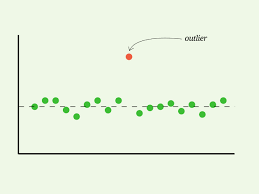

In [64]:
q1 = df_limpieza["price"].quantile(0.25)
q1

np.float64(16.0)

In [66]:
q3 = df_limpieza["price"].quantile(0.75)
q3

np.float64(38.0)

In [67]:
iqr = q3-q1
iqr

np.float64(22.0)

In [68]:
debajo, encima = (q1 - 1.5*iqr), (q3 + 1.5*iqr)
debajo, encima

(np.float64(-17.0), np.float64(71.0))

In [69]:
df_limpieza = df_csv.copy()
df_limpieza["price_outlier"] = df_limpieza["price"].clip(lower=df_limpieza["price"].quantile(0.01),upper=df_limpieza["price"].quantile(0.99))
df_limpieza[["price","price_outlier"]].describe()

,price,price_outlier
count,130641.000000,130641.000000
mean,33.123399,31.945048
std,36.368177,24.915466
min,4.000000,8.000000
25%,16.000000,16.000000
50%,24.000000,24.000000
75%,40.000000,40.000000
max,2300.000000,150.000000


### Normalizacion o Estandarizacion

In [73]:
df_limpieza = df_csv.copy()
sc = MinMaxScaler()
df_limpieza["price_minmax"] = sc.fit_transform(df_limpieza[["price"]])
df_limpieza["price_z"] = (df_limpieza["price"]-df_limpieza["price"].mean())/df_limpieza["price"].std()
df_limpieza[["price","price_minmax","price_z"]].head(5)

,price,price_minmax,price_z
0,235.0,0.100610,5.550913
1,110.0,0.046167,2.113843
2,90.0,0.037456,1.563911
3,65.0,0.026568,0.876497
4,66.0,0.027003,0.903994


### Parseo de fechas

In [74]:
df_limpieza = df_csv.copy()
#date_f
df_limpieza["year"]= df_limpieza["date_f"].dt.year
df_limpieza["year"].head(2)

0    2025
1    2025
Name: year, dtype: int32

In [75]:
df_limpieza["month"]= df_limpieza["date_f"].dt.month
df_limpieza["month"].head(2)

0     4
1    12
Name: month, dtype: int32

In [76]:
df_limpieza["day"]= df_limpieza["date_f"].dt.day
df_limpieza["day"].head(2)

0    13
1    15
Name: day, dtype: int32

In [78]:
df_limpieza[["date_f","year","month","day"]].head(5)

,date_f,year,month,day
0,2025-04-13,2025,4,13
1,2025-12-15,2025,12,15
2,2025-09-28,2025,9,28
3,2025-04-17,2025,4,17
4,2025-03-13,2025,3,13


### Renombrado de columnas

In [82]:
df_limpieza = df_csv.copy()
df_limpieza.columns = df_limpieza.columns.str.lower().str.replace("_","")
df_limpieza.columns

Index(['country', 'designation', 'points', 'price', 'province', 'region1',
       'region2', 'variety', 'winery', 'lastyearpoints', 'datef'],
      dtype='object')

### Eliminar columnas o filas

In [95]:
df_limpieza = df_csv.copy()
df_limpieza = df_limpieza.drop(columns=["country"]).query("price > 7 and price < 151")
len(df_limpieza)

128248

In [96]:
df_limpieza["price"].describe()

count    128248.000000
mean         30.979017
std          22.085517
min           8.000000
25%          16.000000
50%          24.000000
75%          40.000000
max         150.000000
Name: price, dtype: float64

### validaciones

In [ ]:
x = 10
assert x > 0, "x debe ser mayor que 0"   # ✅ no pasa nada
assert x < 5, "x debe ser menor que 5"   # ❌ lanza AssertionError

AssertionError: x debe ser menor que 5

In [106]:
df_limpieza = df_csv.copy()
(df_limpieza["price"] > 3000)

0         False
1         False
2         False
3         False
4         False
          ...  
144032    False
144033    False
144034    False
144035    False
144036    False
Name: price, Length: 144037, dtype: bool

In [ ]:
df_limpieza = df_csv.copy()
assert (df_limpieza["price"] > 3000).all(), "price es outlier por encima "
assert (df_limpieza["price"] > 8).all(), "price es outlier por debajo "
"el precio esta ok"

AssertionError: price es outlier por encima 